In [16]:
#import dependencies
import pandas as pd
import numpy as np
import requests
import json
import random
import matplotlib.pyplot as plt


# Clean Census Data and filter for counties to query yelp data for

In [17]:
#path to CSV file
csv_path="2015_census_tract_data.csv"

#read CSV file
Census_file=pd.read_csv(csv_path)


In [18]:
#check to see if there are rows with missing data
Census_file.count()

CensusTract        74001
State              74001
County             74001
TotalPop           74001
Men                74001
Women              74001
Hispanic           73311
White              73311
Black              73311
Native             73311
Asian              73311
Pacific            73311
Citizen            74001
Income             72901
IncomeErr          72901
IncomePerCap       73261
IncomePerCapErr    73261
Poverty            73166
ChildPoverty       72883
Professional       73194
Service            73194
Office             73194
Construction       73194
Production         73194
Drive              73204
Carpool            73204
Transit            73204
Walk               73204
OtherTransp        73204
WorkAtHome         73204
MeanCommute        73052
Employed           74001
PrivateWork        73194
PublicWork         73194
SelfEmployed       73194
FamilyWork         73194
Unemployment       73199
dtype: int64

In [19]:
#remove rows with missing data
clean_census_file=Census_file.dropna(how="any")
clean_census_file.count()

CensusTract        72727
State              72727
County             72727
TotalPop           72727
Men                72727
Women              72727
Hispanic           72727
White              72727
Black              72727
Native             72727
Asian              72727
Pacific            72727
Citizen            72727
Income             72727
IncomeErr          72727
IncomePerCap       72727
IncomePerCapErr    72727
Poverty            72727
ChildPoverty       72727
Professional       72727
Service            72727
Office             72727
Construction       72727
Production         72727
Drive              72727
Carpool            72727
Transit            72727
Walk               72727
OtherTransp        72727
WorkAtHome         72727
MeanCommute        72727
Employed           72727
PrivateWork        72727
PublicWork         72727
SelfEmployed       72727
FamilyWork         72727
Unemployment       72727
dtype: int64

In [20]:
#column names
clean_census_file.columns

Index(['CensusTract', 'State', 'County', 'TotalPop', 'Men', 'Women',
       'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen',
       'Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

In [21]:
#create a dataframe from the file
DF_census_file=pd.DataFrame(clean_census_file)
DF_census_file.head()

,CensusTract,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga,1948,940,1008,0.9,87.4,7.7,0.3,...,0.5,2.3,2.1,25.0,943,77.1,18.3,4.6,0.0,5.4
1,1001020200,Alabama,Autauga,2156,1059,1097,0.8,40.4,53.3,0.0,...,0.0,0.7,0.0,23.4,753,77.0,16.9,6.1,0.0,13.3
2,1001020300,Alabama,Autauga,2968,1364,1604,0.0,74.5,18.6,0.5,...,0.0,0.0,2.5,19.6,1373,64.1,23.6,12.3,0.0,6.2
3,1001020400,Alabama,Autauga,4423,2172,2251,10.5,82.8,3.7,1.6,...,0.0,2.6,1.6,25.3,1782,75.7,21.2,3.1,0.0,10.8
4,1001020500,Alabama,Autauga,10763,4922,5841,0.7,68.5,24.8,0.0,...,0.0,0.6,0.9,24.8,5037,67.1,27.6,5.3,0.0,4.2


In [22]:
grouped_income = DF_census_file.groupby(["State","County"]).apply(lambda x: np.average(x["Income"],weights=x["TotalPop"]))
grouped_income=pd.DataFrame(grouped_income,columns=["Income"])
grouped_income=grouped_income.reset_index()
grouped_income["ID"] = grouped_income["State"]+grouped_income["County"]
grouped_income.head()

,State,County,Income,ID
0,Alabama,Autauga,51696.286576,AlabamaAutauga
1,Alabama,Baldwin,51074.359577,AlabamaBaldwin
2,Alabama,Barbour,32959.300349,AlabamaBarbour
3,Alabama,Bibb,38886.634888,AlabamaBibb
4,Alabama,Blount,46237.969018,AlabamaBlount


In [23]:
#find total number of people per ethnicity
DF_census_file["Hispanic Population"]=(DF_census_file["Hispanic"]/100)*DF_census_file["TotalPop"]
DF_census_file["White Population"]=(DF_census_file["White"]/100)*DF_census_file["TotalPop"]
DF_census_file["Black Population"]=(DF_census_file["Black"]/100)*DF_census_file["TotalPop"]
DF_census_file["Native Population"]=(DF_census_file["Native"]/100)*DF_census_file["TotalPop"]
DF_census_file["Asian Population"]=(DF_census_file["Asian"]/100)*DF_census_file["TotalPop"]
DF_census_file["Pacific Population"]=(DF_census_file["Pacific"]/100)*DF_census_file["TotalPop"]
DF_census_file["Other Population"]=DF_census_file["TotalPop"]-DF_census_file["Pacific Population"]-DF_census_file["Asian Population"]-DF_census_file["Native Population"]-DF_census_file["Hispanic Population"]-DF_census_file["White Population"]-DF_census_file["Black Population"]
DF_census_file["ID"]=DF_census_file["State"]+DF_census_file["County"]


In [24]:
TractCount=DF_census_file.groupby(["State","County"]).count()["CensusTract"]
TractCount=pd.DataFrame(TractCount)
TractCount=TractCount.reset_index()
TractCount.head()

,State,County,CensusTract
0,Alabama,Autauga,12
1,Alabama,Baldwin,31
2,Alabama,Barbour,9
3,Alabama,Bibb,4
4,Alabama,Blount,9


In [25]:
DF_census_file.head()

,CensusTract,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,FamilyWork,Unemployment,Hispanic Population,White Population,Black Population,Native Population,Asian Population,Pacific Population,Other Population,ID
0,1001020100,Alabama,Autauga,1948,940,1008,0.9,87.4,7.7,0.3,...,0.0,5.4,17.532,1702.552,149.996,5.844,11.688,0.000,60.388,AlabamaAutauga
1,1001020200,Alabama,Autauga,2156,1059,1097,0.8,40.4,53.3,0.0,...,0.0,13.3,17.248,871.024,1149.148,0.000,49.588,0.000,68.992,AlabamaAutauga
2,1001020300,Alabama,Autauga,2968,1364,1604,0.0,74.5,18.6,0.5,...,0.0,6.2,0.000,2211.160,552.048,14.840,41.552,8.904,139.496,AlabamaAutauga
3,1001020400,Alabama,Autauga,4423,2172,2251,10.5,82.8,3.7,1.6,...,0.0,10.8,464.415,3662.244,163.651,70.768,0.000,0.000,61.922,AlabamaAutauga
4,1001020500,Alabama,Autauga,10763,4922,5841,0.7,68.5,24.8,0.0,...,0.0,4.2,75.341,7372.655,2669.224,0.000,408.994,0.000,236.786,AlabamaAutauga


In [26]:
Test_census_file=DF_census_file[["State","County","ID","TotalPop","Men","Women","Hispanic Population","White Population","Black Population","Native Population","Asian Population","Other Population"]]
Test_census_file=Test_census_file.groupby(["State","County","ID"],as_index=False).sum()
Test_census_file.head()

,State,County,ID,TotalPop,Men,Women,Hispanic Population,White Population,Black Population,Native Population,Asian Population,Other Population
0,Alabama,Autauga,AlabamaAutauga,55221,26745,28476,1443.611,41851.017,10230.777,232.967,528.826,924.898
1,Alabama,Baldwin,AlabamaBaldwin,195121,95314,99807,8767.268,162150.656,18530.346,1091.640,1296.962,3284.128
2,Alabama,Barbour,AlabamaBarbour,26932,14497,12435,1246.497,12451.093,12574.719,50.670,117.623,491.398
3,Alabama,Bibb,AlabamaBibb,22604,12073,10531,499.358,16839.955,4842.938,97.439,22.741,301.569
4,Alabama,Blount,AlabamaBlount,57710,28512,29198,4983.152,50700.459,877.368,168.037,85.670,895.314


In [27]:
merge_table=pd.merge(Test_census_file,grouped_income,on=["State","County","ID"] ,how="outer")
merge_table.head()


,State,County,ID,TotalPop,Men,Women,Hispanic Population,White Population,Black Population,Native Population,Asian Population,Other Population,Income
0,Alabama,Autauga,AlabamaAutauga,55221,26745,28476,1443.611,41851.017,10230.777,232.967,528.826,924.898,51696.286576
1,Alabama,Baldwin,AlabamaBaldwin,195121,95314,99807,8767.268,162150.656,18530.346,1091.640,1296.962,3284.128,51074.359577
2,Alabama,Barbour,AlabamaBarbour,26932,14497,12435,1246.497,12451.093,12574.719,50.670,117.623,491.398,32959.300349
3,Alabama,Bibb,AlabamaBibb,22604,12073,10531,499.358,16839.955,4842.938,97.439,22.741,301.569,38886.634888
4,Alabama,Blount,AlabamaBlount,57710,28512,29198,4983.152,50700.459,877.368,168.037,85.670,895.314,46237.969018


In [28]:
merge_table=pd.merge(merge_table,TractCount,on=["State","County"],how="outer")
merge_table.head()

,State,County,ID,TotalPop,Men,Women,Hispanic Population,White Population,Black Population,Native Population,Asian Population,Other Population,Income,CensusTract
0,Alabama,Autauga,AlabamaAutauga,55221,26745,28476,1443.611,41851.017,10230.777,232.967,528.826,924.898,51696.286576,12
1,Alabama,Baldwin,AlabamaBaldwin,195121,95314,99807,8767.268,162150.656,18530.346,1091.640,1296.962,3284.128,51074.359577,31
2,Alabama,Barbour,AlabamaBarbour,26932,14497,12435,1246.497,12451.093,12574.719,50.670,117.623,491.398,32959.300349,9
3,Alabama,Bibb,AlabamaBibb,22604,12073,10531,499.358,16839.955,4842.938,97.439,22.741,301.569,38886.634888,4
4,Alabama,Blount,AlabamaBlount,57710,28512,29198,4983.152,50700.459,877.368,168.037,85.670,895.314,46237.969018,9


In [29]:
#Filter
merge_table["Hispanic Population %"]=merge_table["Hispanic Population"]/merge_table["TotalPop"]*100
merge_table["White Population %"]=merge_table["White Population"]/merge_table["TotalPop"]*100
merge_table["Black  Population %"]=merge_table["Black Population"]/merge_table["TotalPop"]*100
merge_table["Asian Population %"]=merge_table["Asian Population"]/merge_table["TotalPop"]*100
merge_table["Other Population %"]=merge_table["Other Population"]/merge_table["TotalPop"]*100
merge_table["Native Population %"]=merge_table["Native Population"]/merge_table["TotalPop"]*100
merge_table["% Men"]=merge_table["Men"]/merge_table["TotalPop"]*100
merge_table["% Women"]=merge_table["Women"]/merge_table["TotalPop"]*100


In [30]:
merge_table.head()

,State,County,ID,TotalPop,Men,Women,Hispanic Population,White Population,Black Population,Native Population,...,Income,CensusTract,Hispanic Population %,White Population %,Black Population %,Asian Population %,Other Population %,Native Population %,% Men,% Women
0,Alabama,Autauga,AlabamaAutauga,55221,26745,28476,1443.611,41851.017,10230.777,232.967,...,51696.286576,12,2.614243,75.788227,18.526968,0.957654,1.674903,0.421881,48.432661,51.567339
1,Alabama,Baldwin,AlabamaBaldwin,195121,95314,99807,8767.268,162150.656,18530.346,1091.640,...,51074.359577,31,4.493247,83.102616,9.496849,0.664696,1.683124,0.559468,48.848663,51.151337
2,Alabama,Barbour,AlabamaBarbour,26932,14497,12435,1246.497,12451.093,12574.719,50.670,...,32959.300349,9,4.628312,46.231594,46.690625,0.436741,1.824588,0.188141,53.828160,46.171840
3,Alabama,Bibb,AlabamaBibb,22604,12073,10531,499.358,16839.955,4842.938,97.439,...,38886.634888,4,2.209158,74.499889,21.425137,0.100606,1.334140,0.431070,53.410901,46.589099
4,Alabama,Blount,AlabamaBlount,57710,28512,29198,4983.152,50700.459,877.368,168.037,...,46237.969018,9,8.634815,87.853854,1.520305,0.148449,1.551402,0.291175,49.405649,50.594351


In [31]:
merged_clean=merge_table[["State","County","TotalPop","Income","CensusTract","White Population %","Hispanic Population %",
                         "Black  Population %","Asian Population %", "Native Population %","Other Population %", "% Men", "% Women"]]

In [32]:
merged_clean.head()


,State,County,TotalPop,Income,CensusTract,White Population %,Hispanic Population %,Black Population %,Asian Population %,Native Population %,Other Population %,% Men,% Women
0,Alabama,Autauga,55221,51696.286576,12,75.788227,2.614243,18.526968,0.957654,0.421881,1.674903,48.432661,51.567339
1,Alabama,Baldwin,195121,51074.359577,31,83.102616,4.493247,9.496849,0.664696,0.559468,1.683124,48.848663,51.151337
2,Alabama,Barbour,26932,32959.300349,9,46.231594,4.628312,46.690625,0.436741,0.188141,1.824588,53.828160,46.171840
3,Alabama,Bibb,22604,38886.634888,4,74.499889,2.209158,21.425137,0.100606,0.431070,1.334140,53.410901,46.589099
4,Alabama,Blount,57710,46237.969018,9,87.853854,8.634815,1.520305,0.148449,0.291175,1.551402,49.405649,50.594351


In [270]:
#create datasets
#exclude puerto rico
America_County=merged_clean[(merged_clean["State"]!="Puerto Rico")&(merged_clean["TotalPop"]>100000)]

#Poor County are counties with incomes less than $25,000
Poor_County=America_County.query("Income<40000")

#Rich County are counties with income more than $75,000
Rich_County=America_County[(America_County["Income"]>75000)& (America_County["CensusTract"]<75)]

#Asian County are counties with Asians making up more than 20% of the population
Asian_County=America_County[(America_County["Asian Population %"]>20)] 

#Black County are counties with Asians making up more than 20% of the population
Latino_County=America_County[(America_County["Hispanic Population %"]>50)] 

#NonDiverse County are counties where one ethnic group makes up more than 80% of the population with a population greater than 400,000
NonDiverse_County=America_County[(America_County["TotalPop"]>400000)&((America_County["White Population %"]>80))]
                                                                      

In [271]:
Latino_County

,State,County,TotalPop,Income,CensusTract,White Population %,Hispanic Population %,Black Population %,Asian Population %,Native Population %,Other Population %,% Men,% Women
110,Arizona,Yuma,202365,43182.504618,52,33.587760,61.043171,1.845416,1.192480,0.991284,1.216854,50.999432,49.000568
195,California,Fresno,952564,49110.379525,198,31.203414,51.656151,4.687261,9.611999,0.478701,2.227228,49.675087,50.324913
198,California,Imperial,173833,44526.545529,30,12.690478,82.395137,1.943612,1.322975,0.693966,0.899263,49.970374,50.029626
200,California,Kern,846046,52381.824787,146,36.822613,51.098290,4.977371,4.479590,0.548360,1.964374,50.283909,49.716091
201,California,Kings,135144,49638.024019,25,35.324930,53.097277,4.518596,3.745284,0.575478,2.497529,50.408453,49.591547
205,California,Madera,153187,45251.622200,23,36.292049,55.650071,3.219963,1.971768,1.044662,1.690930,48.217538,51.782462
209,California,Merced,263885,45139.516702,49,29.928848,56.932982,3.164469,7.363872,0.245444,2.172530,50.458344,49.541656
212,California,Monterey,416351,61238.381250,90,31.664099,57.395058,1.974728,5.943661,0.246171,2.313281,50.070734,49.929266
221,California,San Bernardino,2086484,57756.275750,366,31.192090,51.136663,8.029470,6.541982,0.355623,2.428590,49.598272,50.401728
239,California,Tulare,453410,44365.007995,77,30.717006,62.494647,1.314353,3.209342,0.676785,1.466769,50.070135,49.929865


In [35]:
#creating CSV Files
Diverse_County.to_csv("Diverse_County.csv")
NonDiverse_County.to_csv("NonDiverse_County.csv")
Poor_County.to_csv("Poor_County.csv")
Rich_County.to_csv("Rich_County.csv")

# Yelp Set Up and Data Retreival

In [36]:

import requests
import pprint
import json
from urllib.parse import quote

api_key="HTxE_2fiZiukf88_6zgw-998n3g0Hp2VCZVttuzh8PYAVGYnMqjyF-20vFikX40klyhOv4-s98YvoQNi0WoNSqRkLhKzc6Go8PCNpheK3map5VsYo69Sl5haqpaoWnYx"

API_HOST = 'https://api.yelp.com'
SEARCH_PATH = '/v3/businesses/search'
BUSINESS_PATH = '/v3/businesses/'  # Business ID will come after slash.

Default_Term="restaurant"
Limit_Count=30



In [37]:
#define function to pull information from yelp
def request(host, path, api_key, url_params=None):
    """Given your API_KEY, send a GET request to the API.
    Args:
        host (str): The domain host of the API.
        path (str): The path of the API after the domain.
        API_KEY (str): Your API Key.
        url_params (dict): An optional set of query parameters in the request.
    Returns:
        dict: The JSON response from the request.
    Raises:
        HTTPError: An error occurs from the HTTP request.
    """
    url_params = url_params or {}
    url = '{0}{1}'.format(host, quote(path.encode('utf8')))
    headers = {
        'Authorization': 'Bearer %s' % api_key,
    }

    print(u'Querying {0} ...'.format(url))

    response = requests.request('GET', url, headers=headers, params=url_params)
    return response.json()


In [38]:
#function to pull restaurants based by location
def search(api_key,term,location):
#term: the search term (restaurant)
#location: The search location passed to the api
#returns: the json response
    url_params = {
        'term': term.replace(' ', '+'),
        'location': location.replace(' ', '+'),
        'limit': Limit_Count,
        'sort_by': 'rating'
      }
    return request(API_HOST,SEARCH_PATH,api_key,url_params=url_params)



In [39]:
#Create a function to loop through county datasets


def YelpDF_byCountyType(data_set):

    #create lists to store yelp information
    Restaurant_Name=[]
    Restaurant_City=[]
    Restaurant_State=[]
    Restaurant_zip=[]
    Restaurant_price_cat=[]
    Restaurant_rating=[]
    Restaurant_type=[]
    Restaurant_County=[]
    Restaurant_ReviewCount=[]

    for index,row in data_set.iterrows():
        #print(f"{row['County']}, {row['State']}")
        datatest=search(api_key,"Restaurant",f"{row['County']}, {row['State']}")
        #print(datatest)
        for i in range(Limit_Count):
            #Append Restaurant Name
            try:
                Restaurant_Name.append(datatest["businesses"][i]["name"])
            except IndexError:
                continue
                
            except len(datatest["businesses"][i]["name"])==0:
                Restaurant_Name.append(0)
                

            #Append Restaurant Zip code
            try:  
                Restaurant_zip.append(datatest["businesses"][i]["location"]["zip_code"])
            except len(Restaurant_zip.append(datatest["businesses"][i]["location"]["zip_code"]))==0:
                Restaurant_zip.append('')  

            #appent Restaurant City code
            try:
                Restaurant_City.append(datatest["businesses"][i]["location"]["city"])
            except len(Restaurant_City.append(datatest["businesses"][i]["location"]["city"]))==0:
                Restaurant_City.append('')

            #append county
            try:
                Restaurant_County.append(row['County'])
            except:
                Restaurant_County.append(row['County'])

            #Append State
            try:
                Restaurant_State.append(row)
            except len(Restaurant_State.append(datatest["businesses"][i]["location"]["state"]))==0:
                Restaurant_State.append(row['State'])

            #Append Restaurant Rating
            try:
                Restaurant_rating.append(datatest["businesses"][i]["rating"])  
            except len(Restaurant_rating.append(datatest["businesses"][i]["rating"]))==0:
                Restaurant_rating.append('')

            #Append Restaurant Type
            try: 
                Restaurant_type.append(datatest["businesses"][i]["categories"][0]["title"])
            except:
                Restaurant_type.append('')

            #Append Restaurant Review Count
            try:
                Restaurant_ReviewCount.append(datatest["businesses"][i]["review_count"])
            except:
                Restaurant_ReviewCount.append(0)

            #append Restaurant Price

            try:
                Restaurant_price_cat.append(datatest["businesses"][i]["price"])
            except KeyError:
                Restaurant_price_cat.append('')
            except len(Restaurant_price_cat.append(datatest["businesses"][i]["price"]))== 0:
                Restaurant_price_cat.append('')

            Yelp_df=pd.DataFrame({"Restaurant Name":Restaurant_Name,"Restaurant City":Restaurant_City,"State":Restaurant_State,
                     "ZipCode":Restaurant_zip,"Type":Restaurant_type,
                      "Rating":Restaurant_rating,"County":Restaurant_County,"Review Count":Restaurant_ReviewCount, 
                     "Price Cat":Restaurant_price_cat})
            merged_df=pd.merge(Yelp_df,data_set,on=["County"] ,how="outer")
    return merged_df        
    
  
    
    
    
    
    



In [40]:
#pull yelp data for different county datasets
Poor_County_Yelp_df=YelpDF_byCountyType(Poor_County)


Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...


In [41]:
Poor_County_Yelp_df.head()

,County,Price Cat,Rating,Restaurant City,Restaurant Name,Review Count,State_x,Type,ZipCode,State_y,...,Income,CensusTract,White Population %,Hispanic Population %,Black Population %,Asian Population %,Native Population %,Other Population %,% Men,% Women
0,Mohave,$,4.5,Kingman,El Paraiso,141,State Arizona County ...,Mexican,86401,Arizona,...,39249.579981,43,78.219482,15.645608,0.978638,1.122601,1.698611,2.18776,50.339296,49.660704
1,Mohave,$,4.5,Kingman,Sirens Cafe & Custom Catering,152,State Arizona County ...,Sandwiches,86401,Arizona,...,39249.579981,43,78.219482,15.645608,0.978638,1.122601,1.698611,2.18776,50.339296,49.660704
2,Mohave,$,4.5,Kingman,El Salsas Taco Shop,62,State Arizona County ...,Mexican,86401,Arizona,...,39249.579981,43,78.219482,15.645608,0.978638,1.122601,1.698611,2.18776,50.339296,49.660704
3,Mohave,$$,4.0,Kingman,Floyd and Company Real Pit BBQ,325,State Arizona County ...,Barbeque,86401,Arizona,...,39249.579981,43,78.219482,15.645608,0.978638,1.122601,1.698611,2.18776,50.339296,49.660704
4,Mohave,$$,4.5,Kingman,India Spice N Bar,198,State Arizona County ...,Indian,86401,Arizona,...,39249.579981,43,78.219482,15.645608,0.978638,1.122601,1.698611,2.18776,50.339296,49.660704


In [42]:
Rich_County_Yelp_df=YelpDF_byCountyType(Rich_County)


Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying h

In [43]:
Rich_County_Yelp_df.head()

,County,Price Cat,Rating,Restaurant City,Restaurant Name,Review Count,State_x,Type,ZipCode,State_y,...,Income,CensusTract,White Population %,Hispanic Population %,Black Population %,Asian Population %,Native Population %,Other Population %,% Men,% Women
0,Anchorage Municipality,$,5.0,Anchorage,International House of Hot Dogs,226,State Alask...,Hot Dogs,99501,Alaska,...,83256.528553,55,60.334924,8.59311,5.524161,8.699109,6.289433,8.464023,51.193051,48.806949
1,Anchorage Municipality,$$,4.5,Anchorage,Moose's Tooth,1560,State Alask...,Pizza,99503,Alaska,...,83256.528553,55,60.334924,8.59311,5.524161,8.699109,6.289433,8.464023,51.193051,48.806949
2,Anchorage Municipality,$$,4.5,Anchorage,Tommy's Burger Stop,319,State Alask...,Burgers,99503,Alaska,...,83256.528553,55,60.334924,8.59311,5.524161,8.699109,6.289433,8.464023,51.193051,48.806949
3,Anchorage Municipality,$$,4.5,Anchorage,Snow City Cafe,1147,State Alask...,Breakfast & Brunch,99501,Alaska,...,83256.528553,55,60.334924,8.59311,5.524161,8.699109,6.289433,8.464023,51.193051,48.806949
4,Anchorage Municipality,$$,4.5,Anchorage,Great Harvest Bread - Anchorage,132,State Alask...,Bakeries,99503,Alaska,...,83256.528553,55,60.334924,8.59311,5.524161,8.699109,6.289433,8.464023,51.193051,48.806949


In [272]:
Asian_County_Yelp_df=YelpDF_byCountyType(Asian_County)

Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...


In [273]:
Latino_County_Yelp_df=YelpDF_byCountyType(Latino_County)

Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying h

In [139]:
NonDiverse_County_Yelp_df=YelpDF_byCountyType(NonDiverse_County)

Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...


In [141]:
NonDiverse_County_Yelp_df.head(20)

,County,Price Cat,Rating,Restaurant City,Restaurant Name,Review Count,State_x,Type,ZipCode,State_y,...,Income,CensusTract,White Population %,Hispanic Population %,Black Population %,Asian Population %,Native Population %,Other Population %,% Men,% Women
0,Ada,$$$,5.0,Meridian,Epi's A Basque Restaurant,192,State Idaho County ...,Basque,83642,Idaho,...,60972.339355,59,85.555919,7.61408,1.095972,2.566507,0.462834,2.547257,50.030778,49.969222
1,Ada,$$,5.0,Boise,Cucina Di Paolo,142,State Idaho County ...,Italian,83705,Idaho,...,60972.339355,59,85.555919,7.61408,1.095972,2.566507,0.462834,2.547257,50.030778,49.969222
2,Ada,$,4.5,Boise,Tango's Subs and Empanadas,297,State Idaho County ...,Argentine,83706,Idaho,...,60972.339355,59,85.555919,7.61408,1.095972,2.566507,0.462834,2.547257,50.030778,49.969222
3,Ada,$$,4.5,Nampa,JP Thailand Express,157,State Idaho County ...,Thai,83686,Idaho,...,60972.339355,59,85.555919,7.61408,1.095972,2.566507,0.462834,2.547257,50.030778,49.969222
4,Ada,$$,4.5,Boise,Kibrom's Restaurant,98,State Idaho County ...,Ethiopian,83703,Idaho,...,60972.339355,59,85.555919,7.61408,1.095972,2.566507,0.462834,2.547257,50.030778,49.969222
5,Ada,$$,4.5,Boise,Wild Root Café & Market,127,State Idaho County ...,Breakfast & Brunch,83702,Idaho,...,60972.339355,59,85.555919,7.61408,1.095972,2.566507,0.462834,2.547257,50.030778,49.969222
6,Ada,$$,4.5,Boise,Goldy's Breakfast Bistro,625,State Idaho County ...,Breakfast & Brunch,83702,Idaho,...,60972.339355,59,85.555919,7.61408,1.095972,2.566507,0.462834,2.547257,50.030778,49.969222
7,Ada,$$,4.5,Boise,Casa Blanca Cuban Grill,234,State Idaho County ...,Cuban,83705,Idaho,...,60972.339355,59,85.555919,7.61408,1.095972,2.566507,0.462834,2.547257,50.030778,49.969222
8,Ada,$,4.5,Boise,Bosnia Express Boex,91,State Idaho County ...,Mediterranean,83706,Idaho,...,60972.339355,59,85.555919,7.61408,1.095972,2.566507,0.462834,2.547257,50.030778,49.969222
9,Ada,$,4.5,Boise,Waffle Me Up,126,State Idaho County ...,Breakfast & Brunch,83702,Idaho,...,60972.339355,59,85.555919,7.61408,1.095972,2.566507,0.462834,2.547257,50.030778,49.969222


#    # Looking for Trends

In [59]:
#What is the proporation of Price Cat resturants in poor versus rich counties
Poor_County_Yelp_df=Poor_County_Yelp_df.loc[Poor_County_Yelp_df["Price Cat"]!='']
TempCount=Poor_County_Yelp_df.groupby("Price Cat").count()['County']
TempCount
df=pd.DataFrame(TempCount)
df['County']=df['County']/df['County'].sum()*100
df

,County
Price Cat,
$,46.840149
$$,49.814126
$$$,2.602230
$$$$,0.743494


In [57]:
Rich_County_Yelp_df=Rich_County_Yelp_df.loc[Rich_County_Yelp_df["Price Cat"]!='']
RichCount=Rich_County_Yelp_df.groupby("Price Cat").count()['County']
Rich_df=pd.DataFrame(RichCount)
Rich_df["County"]=Rich_df["County"]/Rich_df["County"].sum()*100
Rich_df

,County
Price Cat,
$,33.242999
$$,59.439928
$$$,6.142728
$$$$,1.174345


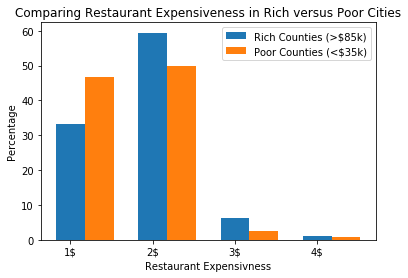

In [73]:
labels=["1$","2$","3$","4$"]

x_axis=np.arange(0, len(labels), 1)
width=0.35

plt.bar(x_axis,Rich_df['County'],width, label="Rich Counties (>$85k)",tick_label=labels)
plt.bar(x_axis+width,df['County'],width,label="Poor Counties (<$35k)")
plt.legend(loc='best')
plt.xlabel("Restaurant Expensivness")
plt.ylabel("Percentage")
plt.title("Comparing Restaurant Expensiveness in Rich versus Poor Cities")
plt.show()



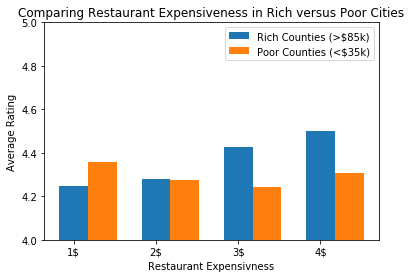

In [208]:
#what is average rating of restaurants by restaurant category
temp_df=Poor_County_Yelp_df.loc[Poor_County_Yelp_df["Price Cat"]!='']
temp_df=Poor_County_Yelp_df.groupby("Price Cat").mean()["Rating"]
temp_df=pd.DataFrame(temp_df)
# print(temp_df)

temp_df2=Rich_County_Yelp_df.loc[Rich_County_Yelp_df["Price Cat"]!='']
temp_df2=Rich_County_Yelp_df.groupby("Price Cat").mean()["Rating"]
temp_df2=pd.DataFrame(temp_df2)
temp_df2.head()

#plot into barchart
labels=["1$","2$","3$","4$"]

x_axis=np.arange(0, len(labels), 1)
width=0.35

plt.bar(x_axis,temp_df['Rating'],width, label="Rich Counties (>$85k)",tick_label=labels)
plt.bar(x_axis+width,temp_df2['Rating'],width,label="Poor Counties (<$35k)")
plt.legend(loc='best')
plt.xlabel("Restaurant Expensivness")
plt.ylabel("Average Rating")
plt.ylim(4,5)
plt.title("Comparing Restaurant Expensiveness in Rich versus Poor Cities")
plt.show()



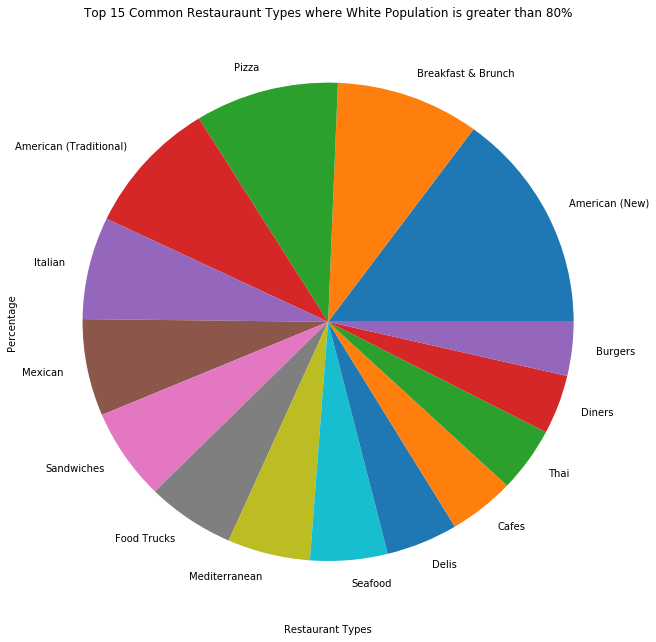

In [257]:
ndiv=NonDiverse_County_Yelp_df.groupby("Type")
ndiv=ndiv["County"].count()
ndiv=ndiv.sort_values(ascending=False)
ndiv=ndiv/ndiv.sum()
ndiv=pd.DataFrame(ndiv)
ndiv=ndiv.iloc[0:15]
# ndiv=ndiv.loc[ndiv["County"]>=0.02]
total=ndiv["County"].sum()
ndiv=ndiv["County"]/total
ndiv=pd.DataFrame(ndiv)

# #ndiv["American"]=ndiv["American (New)"]+ndiv["American (Traditional)"]
# ndiv

# #create pie chart
chart_non_diverse=ndiv["County"].plot(kind='pie',figsize=(11,11))
chart_non_diverse.set_xlabel("Restaurant Types")
chart_non_diverse.set_ylabel("Percentage")
chart_non_diverse.set_title("Top 15 Common Restauraunt Types where White Population is greater than 80%")
plt.show()


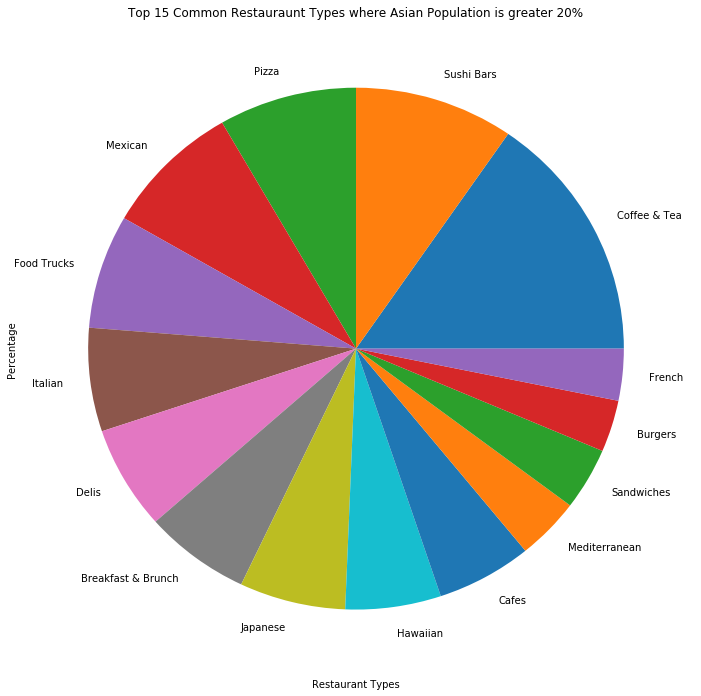

In [274]:
div_df=Asian_County_Yelp_df.groupby("Type")
div=div_df["County"].count()
div=div.sort_values(ascending=False)
div=div/div.sum()
div=pd.DataFrame(div)
div=div.iloc[0:15]
# div=div.loc[div["County"]>=0.02]
total=div["County"].sum()
div=div["County"]/total
div=pd.DataFrame(div)



chart_diverse=div["County"].plot(kind='pie',figsize=(12,12))

chart_diverse.set_xlabel("Restaurant Types")
chart_diverse.set_ylabel("Percentage")
chart_diverse.set_title("Top 15 Common Restauraunt Types where Asian Population is greater 20%")
plt.show()


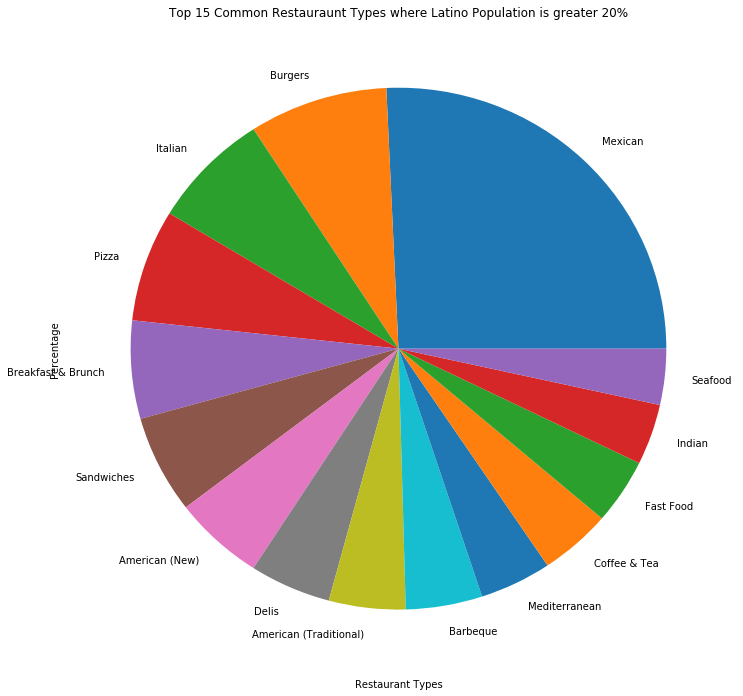

In [276]:
div_df=Latino_County_Yelp_df.groupby("Type")
div=div_df["County"].count()
div=div.sort_values(ascending=False)
div=div/div.sum()
div=pd.DataFrame(div)
div=div.iloc[0:15]
# div=div.loc[div["County"]>=0.02]
total=div["County"].sum()
div=div["County"]/total
div=pd.DataFrame(div)



chart_diverse=div["County"].plot(kind='pie',figsize=(12,12))

chart_diverse.set_xlabel("Restaurant Types")
chart_diverse.set_ylabel("Percentage")
chart_diverse.set_title("Top 15 Common Restauraunt Types where Latino Population is greater 20%")
plt.show()
